After 10 epochs, accuracy = 1.0
After 20 epochs, accuracy = 1.0
After 30 epochs, accuracy = 1.0
After 40 epochs, accuracy = 1.0
After 50 epochs, accuracy = 1.0
After 60 epochs, accuracy = 1.0
After 70 epochs, accuracy = 1.0
After 80 epochs, accuracy = 1.0
After 90 epochs, accuracy = 1.0
After 100 epochs, accuracy = 1.0
W = [ 1.05690241 -1.44874811]
b = -0.470781


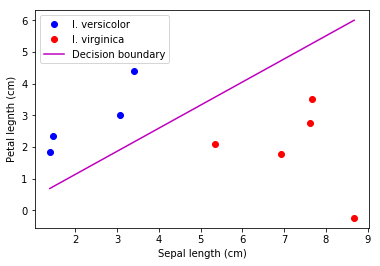

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the data

data = np.loadtxt('/home/mahantesh/m.txt', skiprows=1)
X_data = data[:,:2]
Y_data = data[:,2:] 


x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable([0.0])

# Define the model
logits = tf.matmul(x, W) + b

# Loss function
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(loss)

# Accuracy
predict_op  = tf.greater_equal(logits, tf.zeros_like(logits))
correct_op  = tf.equal(tf.cast(predict_op, tf.float32), y)
accuracy_op = tf.reduce_mean(tf.cast(correct_op, tf.float32))

# Hyperparameters
learning_rate = 0.01
num_epochs    = 100

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(loss)

# TF session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Seed the random number generator for reproducibility
np.random.seed(0)

# Minimize the loss function
for epoch in range(num_epochs):
    # Present each data point once in random order
    idx = np.random.permutation(data.shape[0])
    for i in idx:
        feed_dict = {x: X_data[i:i+1], y: Y_data[i:i+1]}
        sess.run(train_op, feed_dict)

    if (epoch+1) % 10 == 0:
        feed_dict = {x: X_data, y: Y_data}
        accuracy = sess.run(accuracy_op, feed_dict)
        print("After {} epochs, accuracy = {}".format(epoch+1, accuracy))

# Print the result
W_val, b_val = sess.run([W, b])
W_val = W_val[:,0]
b_val = b_val[0]
print("W =", W_val)
print("b =", b_val)

def predict(x_):
    return 1 * sess.run(predict_op, {x: x_})

#-------------------------------------------------------------------------------
# Figure
#-------------------------------------------------------------------------------

# Model predictions
labels = predict(X_data)[:,0]

# Find indices for the two species
idx_0, = np.where(labels == 0)
idx_1, = np.where(labels == 1)

# Plot the data
plt.plot(X_data[idx_0,0], X_data[idx_0,1], 'bo', label='I. versicolor')
plt.plot(X_data[idx_1,0], X_data[idx_1,1], 'ro', label='I. virginica')

# Plot the separating hyperplane
x_sep = np.linspace(X_data[:,0].min(), X_data[:,0].max())
y_sep = (-b_val - W_val[0]*x_sep) / W_val[1]
plt.plot(x_sep, y_sep, 'm', label="Decision boundary")

# Legend
plt.legend()

# Axis labels
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal legnth (cm)")

plt.show()